In [1]:
# loading basic libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import dc_stat_think as dcst
import warnings;warnings.filterwarnings('ignore');

Data from chapionship held in 2013 and 2015 are given. It is suspected that there was swirl is swmming pool where 2013 
championship was held. Using descriptive and statistical analysis, we have to verify that.
Cosidered factors.
1. Different strokes has different split time
2. One split is of 50 meters
3. Initial two splits has different speed to jump factor
4. final two splits has different speed becuase swimmers give their full effort

In [2]:
# Reading Data world cup data
world2013 = pd.read_csv("D:\Ravi_Data\Statistics\world2013.csv",sep=',')
world2015 = pd.read_csv("D:\Ravi_Data\Statistics\world2015.csv",sep=',')
world2013.head()

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,...,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
0,244414,KASHARI,ANXHELA,01-01-1996,F,ALBANIA,ALB,33,4,1,...,28.48,1,28.48,50,1000.0,PRE,50,1,FREE,28.48
1,244417,BORSHI,NOEL,01-01-1996,F,ALBANIA,ALB,1,2,3,...,66.77,1,30.84,50,1000.0,PRE,100,1,FLY,30.84
2,244417,BORSHI,NOEL,01-01-1996,F,ALBANIA,ALB,1,2,3,...,66.77,2,66.77,100,1000.0,PRE,100,1,FLY,35.93
3,244421,ZEKTHI,EVIN,01-01-1996,M,ALBANIA,ALB,12,1,4,...,120.43,1,27.67,50,1047.0,PRE,200,1,FREE,27.67
4,244421,ZEKTHI,EVIN,01-01-1996,M,ALBANIA,ALB,12,1,4,...,120.43,2,58.12,100,1047.0,PRE,200,1,FREE,30.45


# Analyzisng shortest race ( 50 meters, single split) 

In [3]:
lower_lane = [1,2,3]
high_lane = [6,7,8]

low13 = world2013[(world2013.distance == 50) & (world2013.lane.isin(lower_lane)) ][['athleteid','lane','swimtime','stroke']]
high13 = world2013[(world2013.distance == 50) & (world2013.lane.isin(high_lane)) ][['athleteid','lane','swimtime','stroke']]
low13.head()

low15 = world2015[(world2015.distance == 50) & (world2015.lane.isin(lower_lane)) ][['athleteid','lane','swimtime','stroke']]
high15 = world2015[(world2015.distance == 50) & (world2015.lane.isin(high_lane)) ][['athleteid','lane','swimtime','stroke']]
low15.head()

,athleteid,lane,swimtime,stroke
27,109109,2,27.20,BACK
28,115991,3,29.17,BREAST
75,101268,2,30.89,BACK
82,105101,2,28.00,FREE
100,101069,3,24.79,FREE


In [4]:
free13 = low13[low13.stroke == 'FREE'].merge(high13[high13['stroke'] == 'FREE'], how = 'inner',on='athleteid')
breast13 = low13[low13.stroke == 'BREAST'].merge(high13[high13['stroke'] == 'BREAST'], how = 'inner',on='athleteid')
fly13 = low13[low13.stroke == 'FLY'].merge(high13[high13['stroke'] == 'FLY'], how = 'inner',on='athleteid')
back13 = low13[low13.stroke == 'BACK'].merge(high13[high13['stroke'] == 'BACK'], how = 'inner',on='athleteid')

data13 = pd.concat([free13, breast13,fly13, back13], ignore_index=True)[['athleteid','lane_x','swimtime_x','lane_y','swimtime_y','stroke_x']]
data13.columns = ['athleteid','llane','ltime','hlane','htime','stroke']
data13.head()

,athleteid,llane,ltime,hlane,htime,stroke
0,243138,2,25.42,7,25.01,FREE
1,243160,3,24.96,7,24.89,FREE
2,247959,3,25.04,7,24.54,FREE
3,247959,3,24.66,7,24.54,FREE
4,246344,3,22.11,8,21.62,FREE


In [5]:
free15 = low15[low15.stroke == 'FREE'].merge(high15[high15['stroke'] == 'FREE'], how = 'inner',on='athleteid')
breast15 = low15[low15.stroke == 'BREAST'].merge(high15[high15['stroke'] == 'BREAST'], how = 'inner',on='athleteid')
fly15 = low15[low15.stroke == 'FLY'].merge(high15[high15['stroke'] == 'FLY'], how = 'inner',on='athleteid')
back15 = low15[low15.stroke == 'BACK'].merge(high15[high15['stroke'] == 'BACK'], how = 'inner',on='athleteid')

data15 = pd.concat([free15, breast15,fly15, back15], ignore_index=True)[['athleteid','lane_x','swimtime_x','lane_y','swimtime_y','stroke_x']]
data15.columns = ['athleteid','llane','ltime','hlane','htime','stroke']
data15.head()

,athleteid,llane,ltime,hlane,htime,stroke
0,101251,3,22.28,7,22.16,FREE
1,101166,2,24.94,7,24.52,FREE
2,101166,2,24.94,8,24.39,FREE
3,118570,1,24.84,8,25.13,FREE
4,110557,1,22.28,6,22.43,FREE


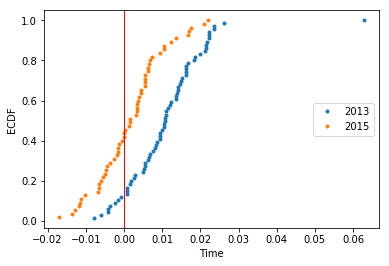

In [6]:
# calculating fractional increase in higher lanes comapared to lower lanes 
f13 = (data13.ltime - data13.htime)/data13.ltime
f15 = (data15.ltime - data15.htime)/data15.ltime

# ECDF of fractional increase in both championship
x13,y13 = dcst.ecdf(f13)
x15,y15 = dcst.ecdf(f15)

# plotting ECDF
plt.plot(x13,y13,marker ='.', linestyle='none')
plt.plot(x15,y15,marker ='.', linestyle='none')

plt.xlabel('Time')
plt.ylabel('ECDF')
plt.legend(['2013','2015'], loc = 5)
plt.axvline(x=0,linewidth=1, color='r')
plt.show()

# Hypothesis testing in 50 Meter race 

In [7]:
f13 = (data13.ltime - data13.htime)/data13.ltime
f13_mean = f13.mean()

# Shift f: f_shift
f13_shift = f13 - f13_mean

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = dcst.draw_bs_reps(f13_shift, np.mean, size=100000)

# Compute and report the p-value
p_val = np.sum(bs_reps >= f13_mean) / 100000
print('p =', p_val)

# thgis hypothesis test cleary shows that there is unusual fractional increase in higher lanes campared to lower lanes

p = 0.0


In [8]:
f15 = (data15.ltime - data15.htime)/data15.ltime
f15_mean = f15.mean()

# Shift f: f_shift
f15_shift = f15 - f15_mean

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = dcst.draw_bs_reps(f15_shift, np.mean, size=100000)

# Compute and report the p-value
p_val = np.sum(bs_reps >= f15_mean) / 100000
print('p =', p_val)

p = 0.07157


# Analyzisng shortest race - 1500 meters, (30 - 4) 26 split 

In [9]:
long13 = world2013[(world2013['distance'] == 1500) & (~world2013.split.isin([1,2,29,30]))& (~world2013.lane.isin([0,9]))]
long15 = world2013[(world2015['distance'] == 1500) & (~world2013.split.isin([1,2,29,30]))& (~world2013.lane.isin([0,9]))]
long13.describe()

long13['split_cat'] = long13['split'].apply(lambda x: 'even' if (x % 2) == 0 else 'odd')
long13 = long13[['athleteid','eventid','lane','split','split_cat','splitswimtime']]

long15['split_cat'] = long15['split'].apply(lambda x: 'even' if (x % 2) == 0 else 'odd')
long15 = long15[['athleteid','eventid','lane','split','split_cat','splitswimtime']]

long13.head()    

,athleteid,eventid,lane,split,split_cat,splitswimtime
84,247671,36,7,3,odd,31.44
85,247671,36,7,4,even,31.27
86,247671,36,7,5,odd,31.63
87,247671,36,7,6,even,31.83
88,247671,36,7,7,odd,32.34


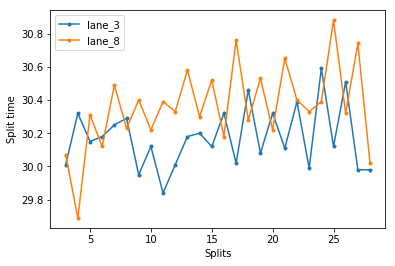

In [10]:
lane_8_244898 = long13[(long13['athleteid'] == 244898) & (long13['lane'] == 8) ]['splitswimtime']
lane_3_244898 = long13[(long13['athleteid'] == 244898) & (long13['lane'] == 3) ]['splitswimtime']

plt.plot(np.arange(3,29,1),lane_3_244898,marker = '.')
plt.plot(np.arange(3,29,1),lane_8_244898,marker = '.')
plt.xlabel('Splits')
plt.ylabel('Split time')
plt.legend(['lane_3','lane_8'])
plt.show()

In [11]:
# considering ratio of odd split times to even split time

sr_15 = long15.groupby(['athleteid','eventid','lane','split_cat'])['splitswimtime'].sum()
df_15 = pd.DataFrame(sr_15.unstack(level = 3)).reset_index()
df_15['ratio'] = df_15['odd']/df_15['even']

sr_13 = long13.groupby(['athleteid','eventid','lane','split_cat'])['splitswimtime'].sum()
df_13 = pd.DataFrame(sr_13.unstack(level = 3)).reset_index()
df_13['ratio'] = df_13['odd']/df_13['even']
df_13.head()

split_cat,athleteid,eventid,lane,even,odd,ratio
0,242783,36,6,398.22,399.63,1.003541
1,242958,36,2,405.99,398.95,0.982660
2,242965,36,4,389.43,388.29,0.997073
3,242965,136,5,385.44,384.31,0.997068
4,243356,13,8,467.78,475.19,1.015841


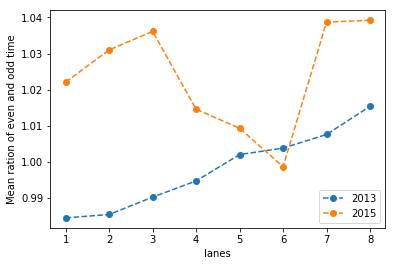

In [12]:
ratio_lanes13_mean = df_13.groupby('lane')['ratio'].mean()
ratio_lanes15_mean = df_15.groupby('lane')['ratio'].mean()
lanes = ratio_lanes13_mean.index

plt.plot(lanes,ratio_lanes13_mean,marker = 'o', linestyle ='dashed')
plt.plot(lanes,ratio_lanes15_mean, marker = 'o',linestyle = 'dashed')
plt.xlabel('lanes')
plt.ylabel('Mean ration of even and odd time')
plt.legend(['2013','2015'])
plt.show()

slope: 0.00446 per lane 95% conf int: [0.00391, 0.00501] per lane


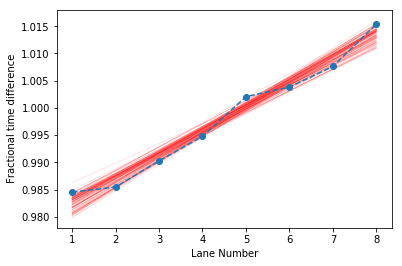

In [13]:
# Compute the slope and intercept of the frac diff/lane curve
slope,intercept = np.polyfit(lanes,ratio_lanes13_mean,1)

# Compute bootstrap replicates
bs_reps_slope, bs_reps_int = dcst.draw_bs_pairs_linreg(lanes,ratio_lanes13_mean,size=10000)

# Compute 95% confidence interval of slope
conf_int = np.percentile(bs_reps_slope,[2.5,97.5])

# Print slope and confidence interval
print("""slope: {0:.5f} per lane 95% conf int: [{1:.5f}, {2:.5f}] per lane""".format(slope, *conf_int))

# x-values for plotting regression lines
x = np.arange(1,9,1)

# Plot 100 bootstrap replicate lines
for i in range(100):
    _ = plt.plot(x, bs_reps_slope[i] * x  + bs_reps_int[i], color='red', alpha=0.2, linewidth=0.5)
   
# Update the plot
plt.plot(lanes,ratio_lanes13_mean,marker = 'o', linestyle ='dashed')
# plt.draw()
plt.xlabel('Lane Number')
plt.ylabel(' Fractional time difference')
plt.show()

#The slope of ratio is about 0.4% per increasing lane. This is quite a substantial difference at worldcup championship.

# Hypothesis testing in 1500 Meter race

In [14]:
# Compute observed correlation: rho
rho = np.corrcoef(lanes, ratio_lanes13_mean)[0,1]

# Initialize permutation reps: perm_reps_rho
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the lanes array: scrambled_lanes
    scrambled_lanes = np.random.permutation(lanes)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i]= np.corrcoef(scrambled_lanes, ratio_lanes13_mean)[0,1]
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)                

# hypothesis test clearly shows lane biasness

p = 0.0
